In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import regex as re

In [2]:
#Read train and test data
train_df=pd.read_csv('train_2kmZucJ.csv')
test_df=pd.read_csv('test_oJQbWVk.csv')

In [3]:
train_df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
train_df

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...


In [5]:
# Tokenize the words
from nltk.tokenize import RegexpTokenizer
t=RegexpTokenizer('\s+',gaps=True)
ft=train_df['tweet']
g=t.tokenize(str(ft))
g

['0',
 '#fingerprint',
 '#Pregnancy',
 'Test',
 'https://goo.gl/h1...',
 '1',
 'Finally',
 'a',
 'transparant',
 'silicon',
 'case',
 '^^',
 'Thanks',
 't...',
 '2',
 'We',
 'love',
 'this!',
 'Would',
 'you',
 'go?',
 '#talk',
 '#makememorie...',
 '3',
 "I'm",
 'wired',
 'I',
 'know',
 "I'm",
 'George',
 'I',
 'was',
 'made',
 'that',
 'wa...',
 '4',
 'What',
 'amazing',
 'service!',
 'Apple',
 "won't",
 'even',
 'talk',
 'to...',
 '...',
 '7915',
 'Live',
 'out',
 'loud',
 '#lol',
 '#liveoutloud',
 '#selfie',
 '#smile...',
 '7916',
 'We',
 'would',
 'like',
 'to',
 'wish',
 'you',
 'an',
 'amazing',
 'day!',
 'Make...',
 '7917',
 'Helping',
 'my',
 'lovely',
 '90',
 'year',
 'old',
 'neighbor',
 'with',
 'he...',
 '7918',
 'Finally',
 'got',
 'my',
 '#smart',
 '#pocket',
 '#wifi',
 'stay',
 'conne...',
 '7919',
 'Apple',
 'Barcelona!!!',
 '#Apple',
 '#Store',
 '#BCN',
 '#Barcelo...',
 'Name:',
 'tweet,',
 'Length:',
 '7920,',
 'dtype:',
 'object']

In [6]:
#Converting words to string format ie the tweets
str(train_df['tweet'])
str(test_df['tweet'])

"0       I hate the new #iphone upgrade. Won't let me d...\n1       currently shitting my fucking pants. #apple #i...\n2       I'd like to puts some CD-ROMS on my iPad, is t...\n3       My ipod is officially dead. I lost all my pict...\n4       Been fighting iTunes all night! I only want th...\n                              ...                        \n1948    #SamsungGalaxyNote7 Explodes, Burns 6-Year-Old...\n1949    Now Available - Hoodie. Check it out here - ht...\n1950    There goes a crack right across the screen. If...\n1951    @codeofinterest as i said #Adobe big time we m...\n1952    Finally I got it .. thanx my father .. #Samsun...\nName: tweet, Length: 1953, dtype: object"

In [7]:
#Text Normalization
!pip install unidecode
!pip install wordninja
import unidecode
import wordninja
def tweet_func(tweet):
    
    # Convert words to lowercase
    text=tweet.lower()
    
    # To handle off the web characters
    text= re.sub(r'@\S+', '',text) 
    text= re.sub(r'http\S+', '',text) 
    text= re.sub(r'pic.\S+', '',text)
      
    # Removes unidecode characters
    text=unidecode.unidecode(text)
      
    # Retain the characters
    text= re.sub(r"[^a-zA-Z+']", ' ',text)
    
    # This will keep the words whose lenght>1
    text=re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ') 

    # split words like 'howareyou' to 'how are you'
    def preprocess_wordninja(sentence):
        def split_words(x):
            x=wordninja.split(x)
            x= [word for word in x if len(word)>1]
            return x
        new_sentence=[ ' '.join(split_words(word)) for word in sentence.split() ]
        return ' '.join(new_sentence)
    
    text=preprocess_wordninja(text)
    
    # It assists in removing spaces
    text= re.sub("\s[\s]+", " ",text).strip()  
    
    return text

In [8]:
train_df['tweet']=train_df['tweet'].apply(lambda x:tweet_func(x))
test_df['tweet']=test_df['tweet'].apply(lambda x:tweet_func(x))

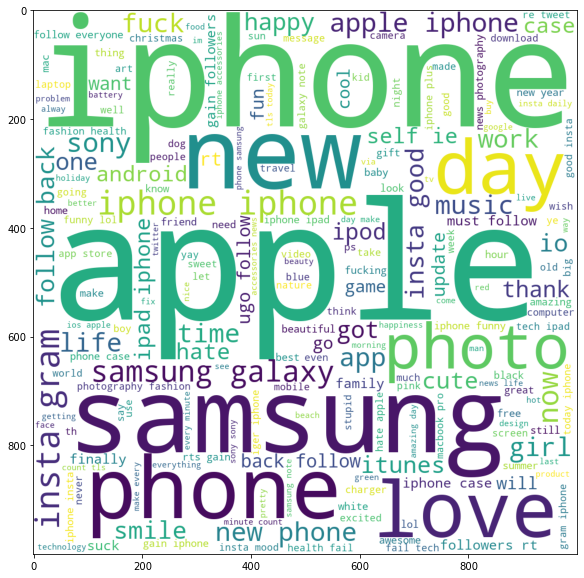

In [9]:
from wordcloud import WordCloud
def make_wordcloud(text):
    wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                min_font_size = 10).generate(" ".join(text.values))
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
make_wordcloud(train_df['tweet'])

In [10]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() 
#Document term matrix
X = cv.fit_transform(train_df['tweet'])
V=  cv.transform(test_df['tweet'])

In [11]:
from sklearn.model_selection import train_test_split
y=train_df['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [12]:
# Use of multinomial Naive Bayes for prediction
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [13]:
y_pred = clf.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
  
cm = confusion_matrix(y_test, y_pred)
  
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[1536  258]
 [  36  546]]


In [14]:
report=classification_report(y_test,y_pred)
print("Classification Report:\n",report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.91      1794
           1       0.68      0.94      0.79       582

    accuracy                           0.88      2376
   macro avg       0.83      0.90      0.85      2376
weighted avg       0.90      0.88      0.88      2376



In [15]:
#Accuracy of the model
from sklearn import metrics
print("Accuracy Score:",metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.8762626262626263


In [16]:
predictions=clf.predict(V)
z=pd.read_csv('test_oJQbWVk.csv')
final = pd.DataFrame({"tweet":z["tweet"],"label_pred":predictions})
final.head()

,tweet,label_pred
0,I hate the new #iphone upgrade. Won't let me d...,1
1,currently shitting my fucking pants. #apple #i...,1
2,"I'd like to puts some CD-ROMS on my iPad, is t...",1
3,My ipod is officially dead. I lost all my pict...,1
4,Been fighting iTunes all night! I only want th...,1
